In [1]:
import matplotlib.pyplot as plt
from ROOT import gRandom, TCanvas, TH1F, TFile, TTree,TH2F,gDirectory, TF1,TF2,gStyle
import ROOT
import sys
from math import exp
from bitstring import BitArray
from read_SSP import read_SSP
from Browse_ROOT import Browse_ROOT

import os
from smooth_wave import smooth_wave
from baseline_subtract import baseline_subtract
import numpy as np
import glob
from plot_histogram import plot_histogram

def Book_Hist(title, lhist):
    """
    Book histograms, append to a list of histograms
    """

    h_ampl = TH1F(title+'_amx_amplitude', 'max amplitude', 50, 0, 0)
    lhist.append(h_ampl)
    h_ampl_Q = TH2F(title+'_amx_amplitude_Q', 'Charge vs max amplitude',
                    100, 0, 100, 100, 0., 50.)
    lhist.append(h_ampl_Q)
    return h_ampl, h_ampl_Q

filedir = 'data/data_Vb_26_5_Vth_5_380nm_50nW_5_Ch9-2016-12-13_19-49-25/'
filenam = 'data_Vb_26_5_Vth_5_380nm_50nW_5_Ch9-2016-12-13_19-49-25.dat'
filedir = 'data/noise_Vb_27_5_Vth_10_Ch9-2016-12-16_16-39-37/'
filedir = 'data/noise_Vb26_0_Vth_10-2016-12-20_15-44-17/'
filedir = 'data/Jan25_2017_data/'
fildat = filedir+filenam

filelist = os.listdir(filedir)
filelist = glob.glob(filedir+'*.dat')
#print filelist
hist = []
voltage = [1, 2, 3, 4, 5, 6, 7]
chan = ['0','1', '2', '5', '6', '7', '8']
voltage = [2]
chan = ['5']
print chan

Welcome to ROOTaaS 6.06/04
['5']


In [2]:
print 'cell breaker'

cell breaker


In [3]:
tr = True
# while tr:
    
for ch in chan:

    for volt in voltage:
        
        file = filedir+'data_Vb_21_'+str(volt)+'*Ch'+ch+'*dat'

        
        dfile = glob.glob(file)
        if len(dfile) != 1:
            print ' non unique data file', file
        
        print 'read file ', dfile
        events = read_SSP(dfile[0])
  

  
        title = 'Ch '+ch + ' V bias = 21.'+str(volt)+ 'V'
        h_ampl, h_ampl_Q = Book_Hist(title, hist)
        lped = 150      # window at the beginning to establish baseline
        av_wave = np.zeros(2000)
        nev = len(events)
        print 'number of events' ,nev
        winlow = 150
        winhigh = 300

read file  ['data/Jan25_2017_data/data_Vb_21_2_LED_OFF_no_source_Ch5-2017-01-25_16-03-39.dat']
number of events 156


In [4]:
iev = 0
maxev = 5
print maxev
for ev in events:
    iev += 1
    if iev > maxev: 
        continue
    (head, wave) = ev
    print head
    wave3 = baseline_subtract(wave, 0, lped)
    nwfm = smooth_wave(wave3, 20)
    plt.plot(nwfm)
    plt.show()
    av_wave += nwfm/nev
    amp_max = max(nwfm[winlow:winhigh])
    charge = sum(nwfm[winlow:winhigh])/(winhigh-winlow)
    h_ampl.Fill(amp_max)
    h_ampl_Q.Fill(amp_max, charge)
print 'done'

#Browse_ROOT()

plot_histogram(h_ampl)
plot_histogram(h_ampl_Q)

plt.plot(av_wave)
plt.title(title)
plt.show()
#exit()

5
(5, 218, 14704, 200, 27545, 5508, 10, 64592, 64565, 64568, 64569, 28765, 0, 12043927)
(5, 217, 14221, 232, 27561, 5508, 10, 65130, 65109, 65099, 65104, 8592, 0, 12976070)
(5, 236, 14159, 194, 27544, 5508, 10, 65194, 65163, 65153, 65151, 12143, 0, 12975179)
(5, 218, 16487, 189, 27526, 5508, 10, 62712, 62707, 62710, 62722, 13695, 0, 12968687)
(5, 216, 14463, 1, 27558, 5508, 11, 64874, 64857, 64856, 64856, 25149, 0, 12965680)
done


In [5]:
nev
print h_ampl
plot_histogram(h_ampl)


<ROOT.TH1F object ("Ch 5 V bias = 21.2V_amx_amplitude") at 0x7f9266d74f30>


In [6]:
plt.plot(av_wave)
plt.show()

In [7]:
print av_wave
from ROOT import TBrowser
TBrowser()
print nev

[ 0.01179487  0.07589744  0.03102564 ..., -0.04589744  0.05025641
  0.01179487]
156


In [8]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)

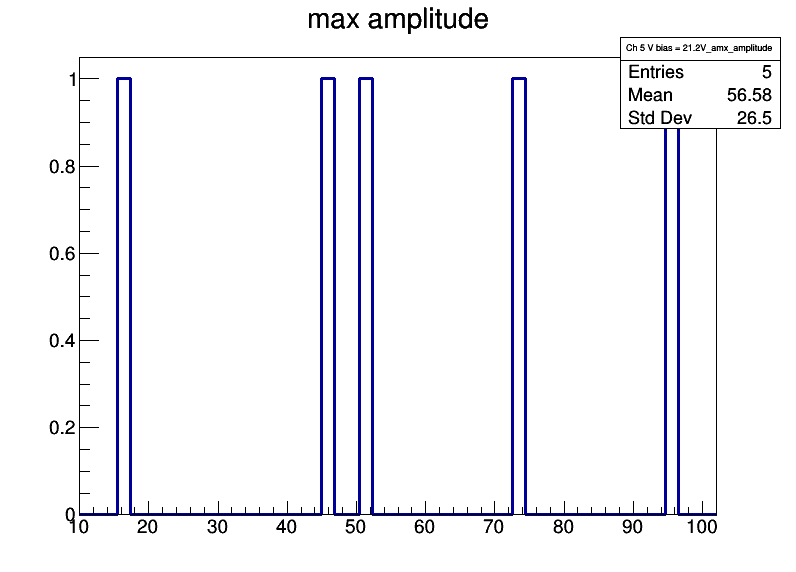

In [9]:
h_ampl.Draw()
c.Draw()

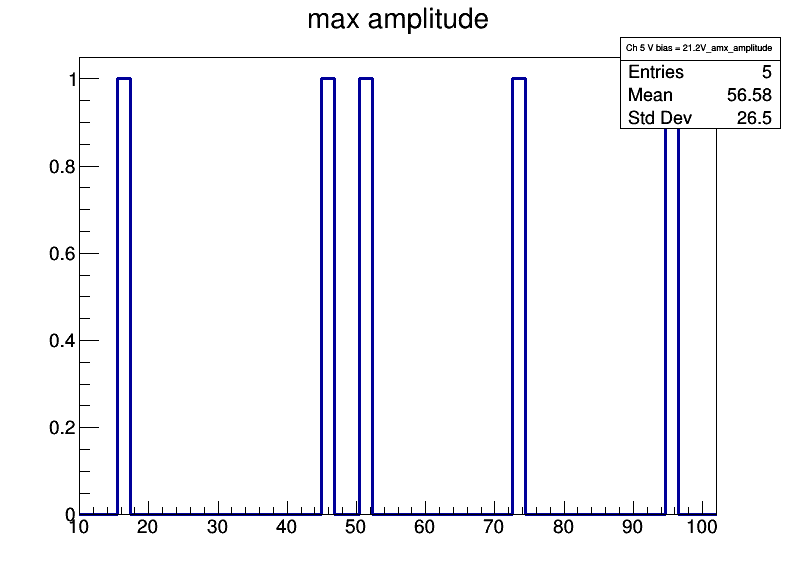

In [10]:
c.Draw()